# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Basic ML Algorithms
tabular 데이터에 효과적이라는 트리 알고리즘을 기준으로 실험을 진행

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/llg/kaggle_3m/data.csv")
data.dropna(inplace=True)
data.head()

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
6,TCGA_CS_5396,3.0,3.0,2,3.0,2.0,2.0,3,3.0,2.0,1.0,3.0,2.0,1.0,53.0,3.0,2.0,0.0
8,TCGA_CS_6186,2.0,4.0,1,2.0,1.0,3.0,2,2.0,2.0,1.0,3.0,2.0,2.0,58.0,3.0,2.0,1.0
9,TCGA_CS_6188,2.0,4.0,3,2.0,3.0,3.0,2,1.0,2.0,1.0,3.0,6.0,2.0,48.0,3.0,2.0,0.0
11,TCGA_CS_6665,2.0,5.0,1,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,6.0,1.0,51.0,3.0,2.0,0.0
14,TCGA_CS_6668,3.0,2.0,2,3.0,2.0,1.0,3,3.0,1.0,1.0,1.0,2.0,1.0,57.0,3.0,2.0,0.0


In [ ]:
data.shape

(78, 18)

In [ ]:
X = data.iloc[:, :-1]  # Features
X.drop(columns=['Patient'], inplace=True)
y = data.iloc[:, -1]   # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 62 samples
Test set size: 16 samples


In [ ]:
# ---- 1. Random Forest ----
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

# ---- 2. XGBoost ----
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f'XGBoost Accuracy: {xgb_accuracy:.4f}')

# ---- 3. CatBoost ----
cat_model = CatBoostClassifier(silent=True, random_state=42)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_preds)
print(f'CatBoost Accuracy: {cat_accuracy:.4f}')

# ---- 4. MLP ----
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_preds = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_preds)
print(f'MLP Accuracy: {mlp_accuracy:.4f}')

Random Forest Accuracy: 0.6875
XGBoost Accuracy: 0.5625
CatBoost Accuracy: 0.6875
MLP Accuracy: 0.6250


# Grid Search for CatBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# GridSearch Parameters
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'depth': [4, 6, 8],  # Depth of the tree
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization
    'border_count': [32, 64, 128]  # Number of splits per feature
}


cat_model = CatBoostClassifier(silent=True, random_state=42)
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=1)
grid_search.fit(X_train, y_train)

# Best Parameters
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best accuracy: {grid_search.best_score_:.4f}')

# Use the best model
best_cat_model = grid_search.best_estimator_
cat_preds = best_cat_model.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_preds)
print(f'CatBoost Accuracy with best parameters: {cat_accuracy:.4f}')

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found: {'border_count': 32, 'depth': 4, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Best accuracy: 0.7579
CatBoost Accuracy with best parameters: 0.8125


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# Random Search for CatBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
import numpy as np

# RandomSearch Parameters
param_dist = {
    'iterations': np.arange(100, 1000, 100),  # Range of iterations from 100 to 1000
    'learning_rate': np.linspace(0.01, 0.3, 10),  # Learning rate between 0.01 and 0.3
    'depth': np.arange(4, 11),  # Depth from 4 to 10
    'l2_leaf_reg': np.arange(1, 10),  # L2 regularization between 1 and 10
    'border_count': [32, 64, 128, 254],  # Number of splits per feature
    'bagging_temperature': np.linspace(0, 1, 5),  # Bagging temperature between 0 and 1
    'random_strength': np.linspace(1, 20, 10)  # Random strength to control overfitting
}

cat_model = CatBoostClassifier(silent=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=500,  # Number of random parameter combinations to try
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train, y_train)

# Best Parameters
print(f'Best parameters found: {random_search.best_params_}')
print(f'Best accuracy: {random_search.best_score_:.4f}')

# Use the best model
best_cat_model = random_search.best_estimator_
cat_preds = best_cat_model.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_preds)
print(f'CatBoost Accuracy with best parameters: {cat_accuracy:.4f}')

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Best parameters found: {'random_strength': 17.88888888888889, 'learning_rate': 0.1711111111111111, 'l2_leaf_reg': 5, 'iterations': 100, 'depth': 5, 'border_count': 128, 'bagging_temperature': 0.0}
Best accuracy: 0.7746
CatBoost Accuracy with best parameters: 0.6250


# MLP using pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, len(y_train.unique()))  # Output layer
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Instantiate the model
input_size = X_train.shape[1]
model = MLP(input_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

# Evaluation
model.eval()
y_pred = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'MLP Model Accuracy: {accuracy:.4f}')

Epoch 1/50, Loss: 0.6939
Epoch 2/50, Loss: 0.6699
Epoch 3/50, Loss: 0.6478
Epoch 4/50, Loss: 0.6322
Epoch 5/50, Loss: 0.6148
Epoch 6/50, Loss: 0.6015
Epoch 7/50, Loss: 0.5892
Epoch 8/50, Loss: 0.5767
Epoch 9/50, Loss: 0.5709
Epoch 10/50, Loss: 0.5628
Epoch 11/50, Loss: 0.5568
Epoch 12/50, Loss: 0.5523
Epoch 13/50, Loss: 0.5533
Epoch 14/50, Loss: 0.5499
Epoch 15/50, Loss: 0.5453
Epoch 16/50, Loss: 0.5433
Epoch 17/50, Loss: 0.5399
Epoch 18/50, Loss: 0.5391
Epoch 19/50, Loss: 0.5372
Epoch 20/50, Loss: 0.5359
Epoch 21/50, Loss: 0.5333
Epoch 22/50, Loss: 0.5286
Epoch 23/50, Loss: 0.5247
Epoch 24/50, Loss: 0.5199
Epoch 25/50, Loss: 0.5145
Epoch 26/50, Loss: 0.5091
Epoch 27/50, Loss: 0.5067
Epoch 28/50, Loss: 0.5013
Epoch 29/50, Loss: 0.4952
Epoch 30/50, Loss: 0.4930
Epoch 31/50, Loss: 0.4874
Epoch 32/50, Loss: 0.4787
Epoch 33/50, Loss: 0.4752
Epoch 34/50, Loss: 0.4706
Epoch 35/50, Loss: 0.4644
Epoch 36/50, Loss: 0.4563
Epoch 37/50, Loss: 0.4540
Epoch 38/50, Loss: 0.4476
Epoch 39/50, Loss: 0.

# Project Details

***

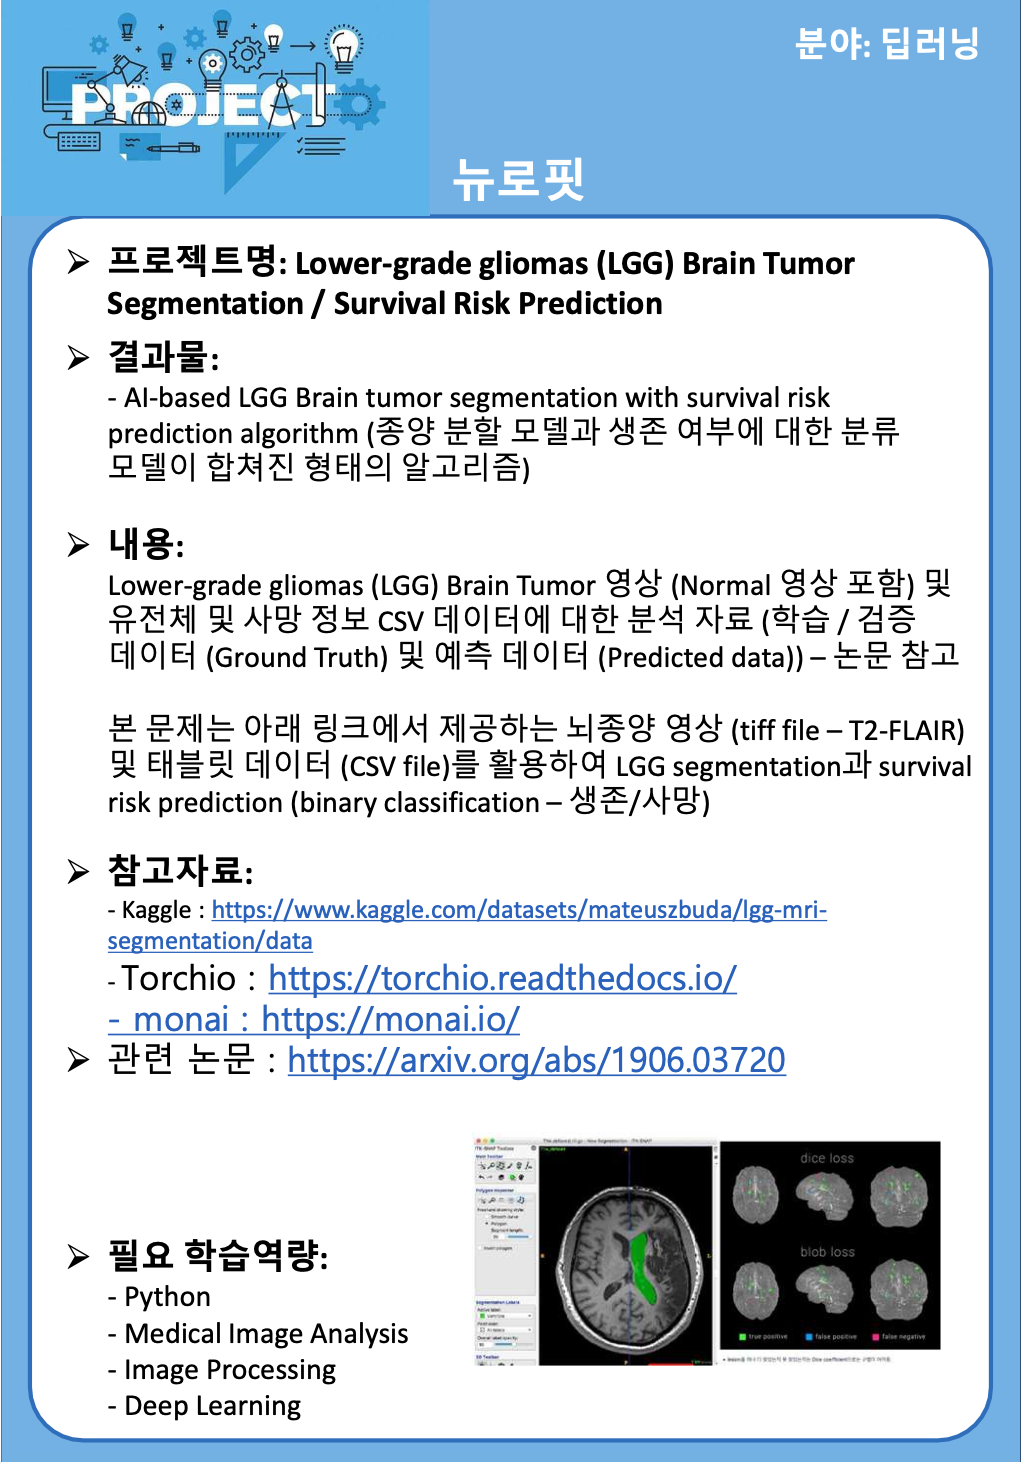